## Hall Effect Heating and Cooling Simulation

## To-Do
- Get schematics of hall bar. Materials, dimensions, ect
- Read about heat transfer functions
- Investigate the maximum heat that can be given from the heater. (In terms of safe currents to run through to get an idea of what values to use).
- Make reposototory work (done)

### Considerations

- Thermal diffusity constant of materials

Made of copper/brass (i think one of those) and outside made of stainless steel (maybe).

- Model heat loss to the environment

Radiation, convection, conduction (not this one for air?). Figure out which one dominates. Is it important to model both? Radiation and convection from room? 

- Consider the fact we are cooling from the outside of the hall bar but heating from the inside.

- Heating

Find the relationship between current given to the resistor in the hall bar and how much heat is produced. Can that just be measure the power going in and then approximate that all that power is dissipated through the resistor.

- Overall measure how much energy is flowing in or out.

- Use finite element analysis

- Consider how we actually put the coolant in. Can only put so much in at one time. Try and make it efficient as well so it doesn't all evaporate (Can be a point for improving the experiment).

## Planning

### Heat transfer methods - Conduction

Using the heat equation:
$$ \frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^{2}u}{\partial x^{2}} + \frac{\partial^{2} u}{\partial y^{2}} \right) $$

Where $\alpha$ is:
$$\alpha = \frac{k}{\rho C_p}$$

For yellow brass:
k= 111 W/ mK [1]
$\rho$ = 

### Heat transfer methods - Radiation

Read wikipedia page do we use the heat transfer function from numerical methods?

### Heat transfer methods - Convection

Read wikipedia page do we use the heat transfer function from numerical methods?

### Implementation
- Bulid a simple simulation of a rectange with a heat sink on the outside and heat source on the inside. Make it arbitrary dimensions for now.
- Try and add a function to say when the temperature of the whole thing is within a certain range and what the difference between the highest and lowest temperatures are.
- Is there a way to have 2 seperate diffusity constants? Is this necessary.
- How does heat loss/gain to/from the environment work/get modelled.
- Calculate the stability constants of the differential equations

### Testing
- Is there a way to test the heat loss and gain equations are working properly?
- Track conservation of energy (This will need to account for energy going in and out of the system. But is that all consistent with the values inside?)

### Taken from numerical methods lab 5 (my work)

Below is a 1D heat equation solver. We can approximate the hall bar as a 1D line with a heat source in the middle and a 'cold source' on the outsides.

In [33]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image 
from mpl_toolkits.mplot3d import Axes3D


def ftcs(t0, t1, dt, x0, x1, dx,a,temph,tempc):
    """Function solves the heat equation in 1D numerically.  
    
    Args:
        t0: The starting time (generally zero) 
        t1: The end time
        dt: The time step size 
        
        x0: The start position of the x grid (generally zero) 
        x1: The end position of the x grid
        dx: The spacing between x grid points
        
        a: Thermal Diffusity
        temp: Temperature of heat source
    
    Returns:
        f: Distribution as a function of x, at the end time t1
        x: The position grid (for information)
        t: The time steps that were used (for information)
    """
    
    # Initialise Arrays
    #  Upper limit is given as e.g. t1+dt since arange generates a half-open interval)
    times = np.arange(t0,t1+dt,dt) 
    x = np.arange(x0, x1+dx, dx)
    
    
    # Initialise Key Parameters
    f = np.empty(x.shape)
    f.fill(21)

    # Set heater temperature
    f[(len(x)//2)]=temph
    # Set cooler temperature
    f[0] = tempc
    f[(len(x)-1)] = tempc

    # Perform n time-steps of the finite difference scheme
    for t in times[1:]:   # Time t0 has already been taken care of in initialisation, above
        # Ensure the source is always as specified
        f[(len(x)//2)]=temph
        f[0] = tempc
        f[(len(x)-1)] = tempc

        # Perform the finite difference scheme
        f[1:-1] = f[1:-1] + (dt*a*(f[2:]-(2*f[1:-1])+f[:-2])/(dx**2))
                             
    return(f,x,times) 

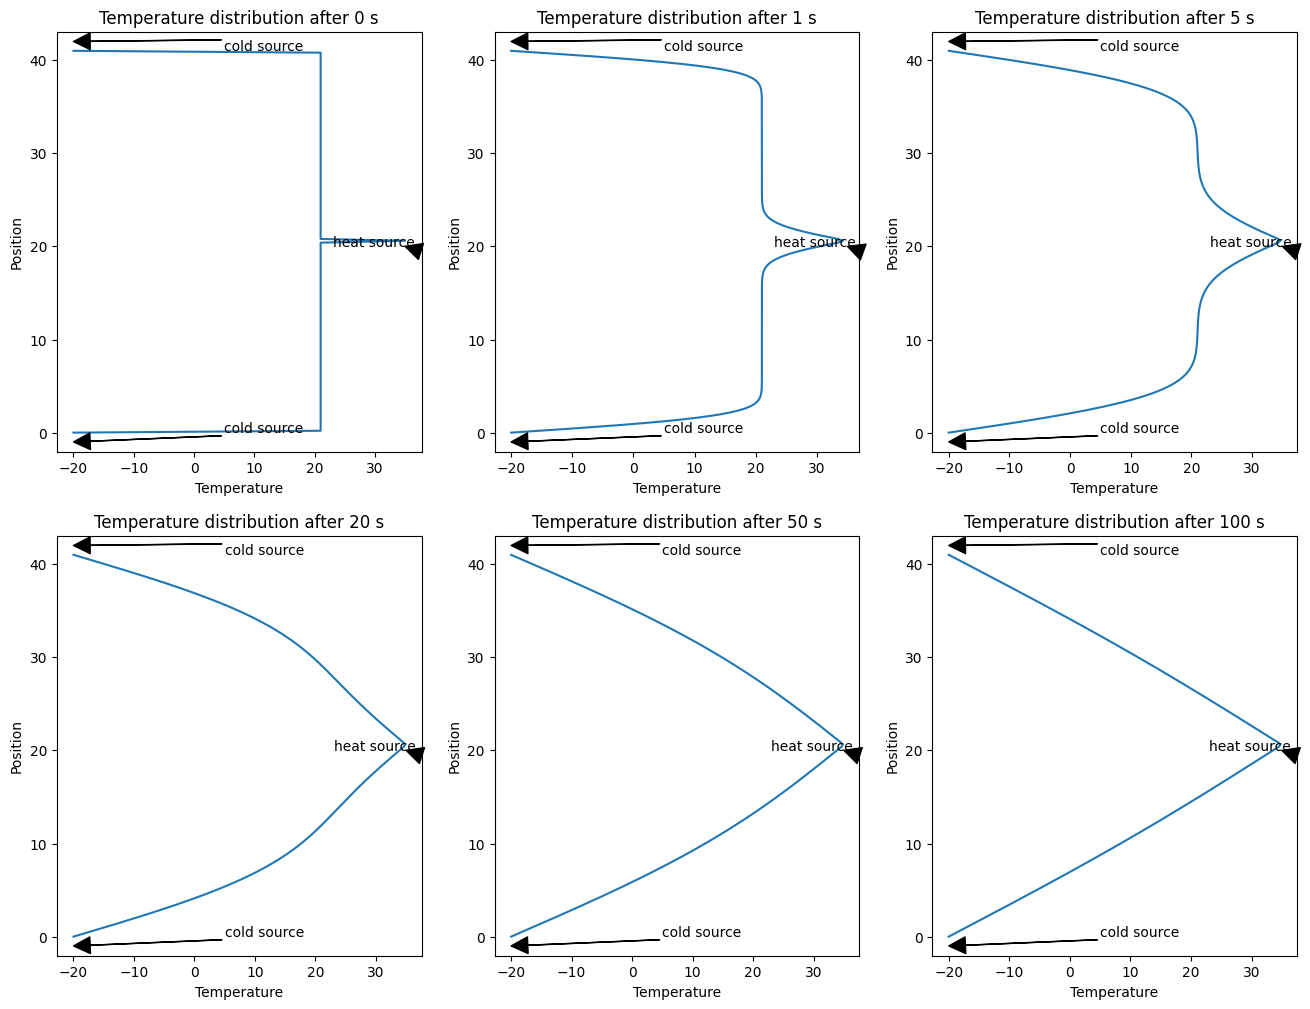

In [55]:
# Run the system for 100 s at a temperature of 20 degrees
times=[0,1,5,20,50,100]
plt.figure(figsize=(16,12))
for i,time in enumerate(times):
    plt.subplot(2,int((len(times)/2)),i+1)
    f,x,t=ftcs(0,time,0.01,0,41,0.2,1,35,-20)
    plt.plot(f,x)
    plt.annotate("heat source", xy=(35,20),xytext=(23,20),arrowprops=dict(facecolor='black', width = 0.1))
    plt.annotate("cold source", xy=(-20,42),xytext=(5,41),arrowprops=dict(facecolor='black', width = 0.1))
    plt.annotate("cold source", xy=(-20,-1),xytext=(5,0),arrowprops=dict(facecolor='black', width = 0.1))
    plt.ylabel("Position")
    plt.xlabel("Temperature")
    plt.title("Temperature distribution after {0} s".format(time))

## 2D

In [76]:
def heat_equation_2D(t0, t1, dt, x0, x1, dx,y0,y1,dy,a,temph,tempc):
    """Function solves the heat equation in 2D numerically.  
    
    Args:
        t0: The starting time (generally zero) 
        t1: The end time
        dt: The time step size 
        
        x0: The start position of the x grid (generally zero) 
        x1: The end position of the x grid
        dx: The spacing between x grid points

        y0: The start position of the y grid (generally zero) 
        y1: The end position of the y grid
        dy: The spacing between y grid points
        
        a: Thermal Diffusity
        temp: Temperature of heat source

    
    Returns:
        f: Distribution as a function of x, at the end time t1
        x: The position grid (for information)
        t: The time steps that were used (for information)
    """
    
    # Initialise Arrays
    #  Upper limit is given as e.g. t1+dt since arange generates a half-open interval)
    times = np.arange(t0,t1+dt,dt) 
    x = np.arange(x0, x1+dx, dx)
    y = np.arange(y0, y1+dy, dy)
    
    # Initialise Key Parameters
    f = np.empty(shape=(x.shape[0],y.shape[0]))
    f.fill(21)
    f[(len(x)//2),(len(y)//2)]=temph
    # Set cold temperatures
    #f[0,0:-1]=tempc
    #f[-1,0:-1]=tempc
    f[0:-1,0]=tempc
    f[0:-1,-1]=tempc

    # Perform n time-steps of the FTCS scheme
    for t in times[1:]:   # Time t0 has already been taken care of in initialisation, above
        # Compute the upwind scheme for the function
        f[1:-1,1:-1] = f[1:-1,1:-1] + (dt*a*((f[2:,1:-1]-(2*f[1:-1,1:-1])+f[:-2,1:-1])/(dx**2) + (f[1:-1,2:]-(2*f[1:-1,1:-1])+f[1:-1,:-2])/(dy**2)))

        # Ensure source temp is constant
        f[(len(x)//2),(len(y)//2)]=temph
       # f[0,0:-1]=tempc
       # f[-1,0:-1]=tempc
        f[0:-1,0]=tempc
        f[0:-1,-1]=tempc
        
    return(f,x,y,times) 

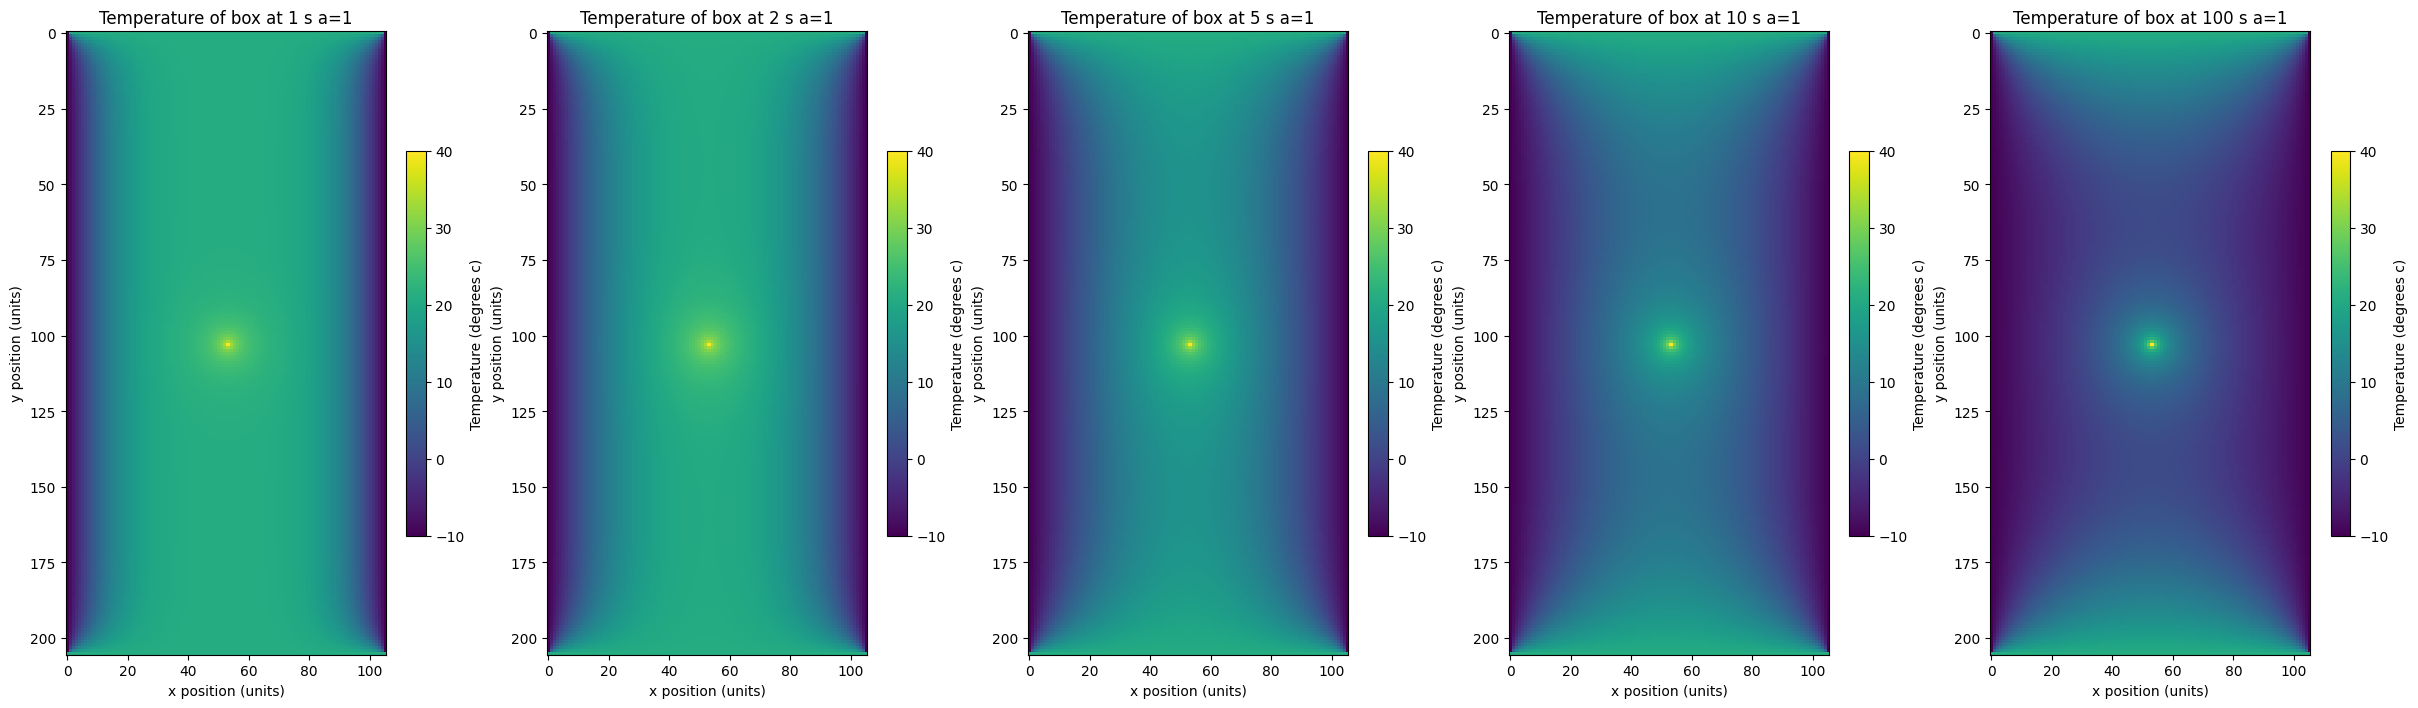

In [79]:
times=[1,2,5,10,100]
plt.figure(figsize=(30,25))
for i,time in enumerate(times):
    f,x,y,t=heat_equation_2D(0,time,2.5e-3,0,41,0.2,0,21,0.2,4,40,-10)
    plt.subplot(1,len(times),i+1)
    plt.title("Temperature of box at {0} s a=1".format(time))
    plt.xlabel("x position (units)")
    plt.ylabel("y position (units)")
    plt.imshow(f)
    cbar=plt.colorbar(shrink=0.2)
    cbar.ax.set_ylabel('Temperature (degrees c)')

# References
[1] https://www.engineeringtoolbox.com/thermal-conductivity-metals-d_858.html